In [1]:
# import modules
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# import main code
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *


lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model


In [2]:
def Mc(q):
    # units of M from wikipedia chirp mass
    return (q/((1+q)**2))**(3/5)

def omega_MA(q, t):
    # my eq. (2.31) found with Mathematica
    my_eq = 15**(3/8)/(2**(9/8)*(-96*Mc(q)**(5/3)*t)**(3/8))
    return my_eq

def t_tilde(t):
    # eq. (B1) in NRSur7dq2 paper 
    return -1.7 + 0.5*((t+5) - np.sqrt((t+5)**2 + 25))

In [5]:
q = 2                                         
chi1 = [.5, .2, .5]
chi2 = [-.3, .1, .5]

# t_ref^0 = -4300 M
t, h, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low)


def get_ft_map(t_ref):
    
    # calculate reference frequency with my get_f_ref function
    f_ref = get_f_ref(q, chi1, chi2, t_ref) 

    # get strains
    t, h, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)

    # calculate h in coprecessing frame
    h_copr = modes_from_iner_to_new_frame(t, h, 'coprecessing')

    # get reference freq from GW phase
    phi_GW = 1/2 * (np.unwrap(np.angle(h_copr[(2,-2)])) - np.unwrap(np.angle(h_copr[(2,2)]))) 
    phi_GW_dot = np.diff(phi_GW) / dt 
    phi_GW_dot = np.append(phi_GW_dot[0], phi_GW_dot)                                    
    f = phi_GW_dot/(2)
    
    return f

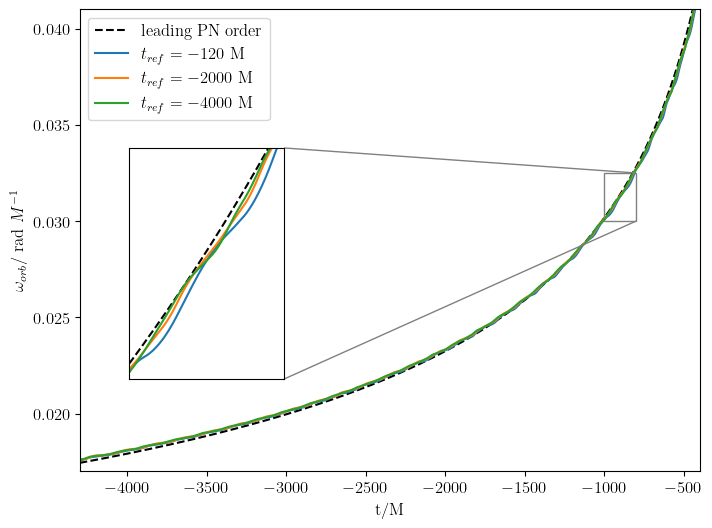

In [6]:
# prepare plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
axins = ax1.inset_axes([0.08, 0.2, 0.25, 0.5])

# plot leading order PN expression
ax1.plot(t, omega_MA(q,t_tilde(t)), '--', label='leading PN order', color='black')
axins.plot(t, omega_MA(q,t_tilde(t)), '--', color='black')

# plot f-t maps
t_refs = [-120, -2000, -4000]
for t_ref in t_refs:
    ax1.plot(t, get_ft_map(t_ref), label=r'$t_{ref} = %s $ M' %t_ref)
    axins.plot(t, get_ft_map(t_ref))
             
             
ax1.set_ylabel('$\omega_{orb}/$ rad $M^{-1}$')
ax1.set_xlabel('t/M')
ax1.legend(loc='upper left')
ax1.set_ylim(.017,.041)
ax1.set_xlim(-4300,-400)

x1, x2, y1, y2 = -1000, -800, .03, .0325 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax1, axins, loc1=4, loc2=1, fc="none", ec="0.5")

#fig.savefig('ft_map.pdf')
plt.show()